In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_from_jarn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6446 entries, 0 to 6445
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_no        6446 non-null   int64  
 1   Address        6446 non-null   object 
 2   CouncilArea    6446 non-null   object 
 3   Car            6446 non-null   int64  
 4   Price          6446 non-null   float64
 5   Date           6446 non-null   object 
 6   Method         6446 non-null   object 
 7   SellerG        6446 non-null   object 
 8   Suburb         6446 non-null   object 
 9   Regionname     6446 non-null   object 
 10  Postcode       6446 non-null   float64
 11  Propertycount  6446 non-null   int64  
 12  Lattitude      6446 non-null   float64
 13  Longtitude     6446 non-null   float64
 14  Distance       6446 non-null   float64
 15  Type           6446 non-null   object 
 16  Rooms          6446 non-null   int64  
 17  Bedroom2       6446 non-null   int64  
 18  Bathroom

#### 1. เปรียบเทียบยอดขายของพนักงานขายแต่ละคน (Plot 7 คนแรก)

In [3]:
Super_seven_saleman = df.groupby('SellerG')['Price'].sum()
Super_seven_saleman = Super_seven_saleman.sort_values(ascending=False)[:7]
Super_seven_saleman

SellerG
Jellis           886856398.0
Nelson           806511199.0
Marshall         632583138.0
hockingstuart    525038748.0
Buxton           348501097.0
Barry            347414788.0
Ray              266073586.0
Name: Price, dtype: float64

<Axes: xlabel='SellerG'>

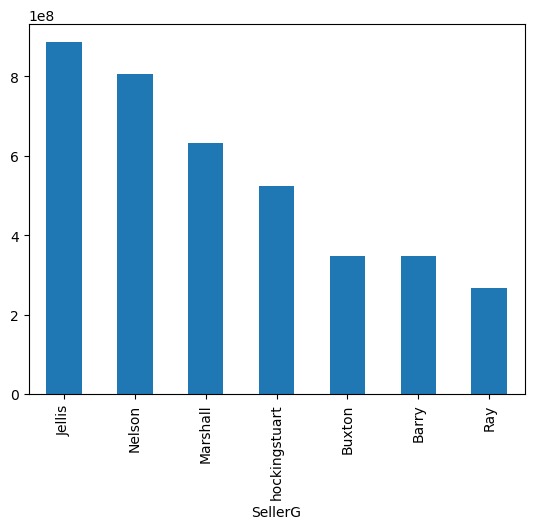

In [4]:
Super_seven_saleman.plot.bar()

#### 2. เปรียบเทียบยอดขายของที่พักอาศัยแต่ละประเภท

<Axes: xlabel='Type'>

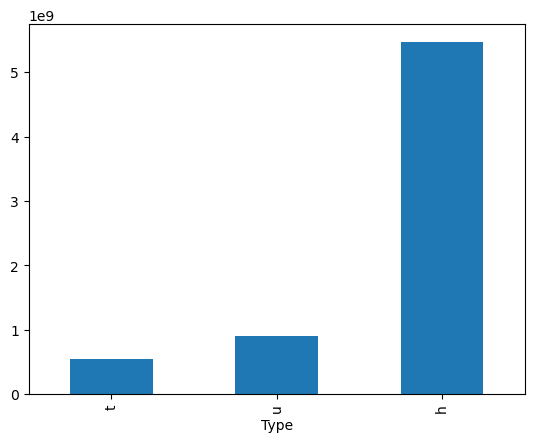

In [5]:
type_price = df.groupby('Type')['Price'].sum()
type_price = type_price.sort_values()
type_price.plot.bar()

#### 3. จำนวนการขายที่พักอาศัยในแต่ละภูมิภาค

<Axes: xlabel='Regionname'>

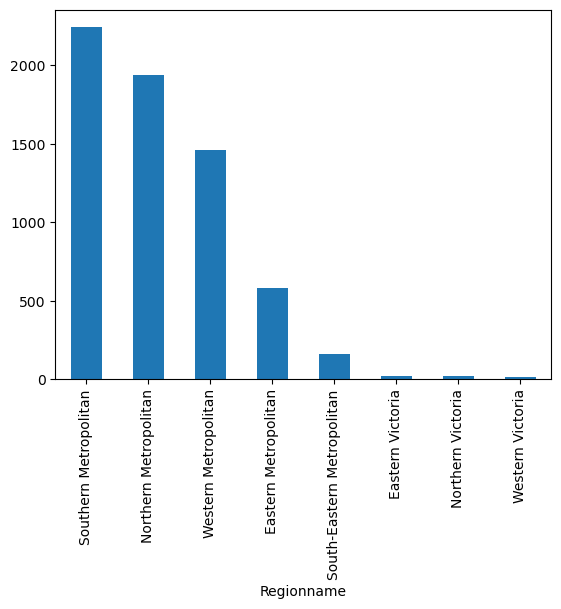

In [6]:
sale_count_region = df.value_counts('Regionname')
sale_count_region.plot.bar()

#### 4. อายุบ้านกับราคา

<Axes: xlabel='YearBuilt', ylabel='Price'>

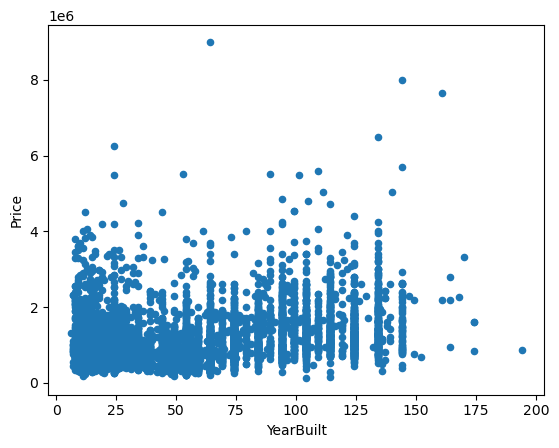

In [14]:
age_price = df.sort_values('YearBuilt')[1:]
age_price['YearBuilt'] = 2024-age_price['YearBuilt']
age_price.plot.scatter(x='YearBuilt', y ='Price')

#### 5. ยอดขายในแต่ละปี

In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Date'] = df['Date'].dt.year

In [9]:
df['Date'].unique()

array([2016, 2017])

<Axes: xlabel='Date'>

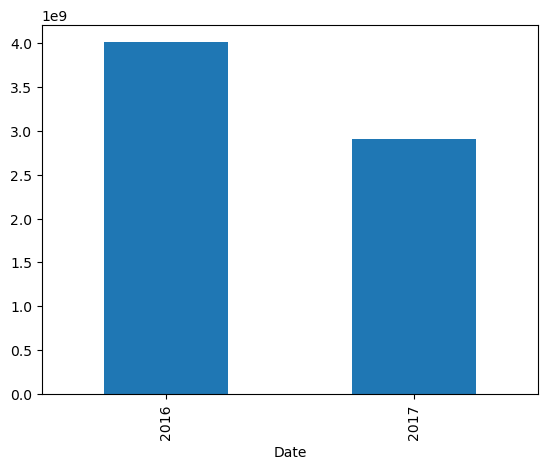

In [10]:
year_price = df.groupby('Date')['Price'].sum()
year_price.plot.bar()